<a href="https://www.kaggle.com/code/rkmaurya93/bank-dataset-binary-calssification?scriptVersionId=253986431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [75]:
import pandas as pd
import numpy as np

In [76]:
df=pd.read_csv("train.csv",index_col=0)

In [77]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [78]:
df.shape

(750000, 17)

# Working with the categorical columns:

### Counting the repetation of values:

In [79]:
categorical_features=df.select_dtypes(include='object').columns

In [80]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [81]:
df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome
id,,,,,,,,,
0,technician,married,secondary,no,no,no,cellular,aug,unknown
1,blue-collar,married,secondary,no,no,no,unknown,jun,unknown
2,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
3,student,single,secondary,no,yes,no,unknown,may,unknown
4,technician,married,secondary,no,yes,no,cellular,feb,unknown


In [82]:
df[categorical_features].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [83]:
df['poutcome'].value_counts()

poutcome
unknown    672450
failure     45115
success     17691
other       14744
Name: count, dtype: int64

In [84]:
df['month'].value_counts()

month
may    228411
aug    128859
jul    110647
jun     93670
nov     66062
apr     41319
feb     37611
jan     18937
oct      9204
sep      7409
mar      5802
dec      2069
Name: count, dtype: int64

In [85]:
df['contact'].value_counts()

contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64

In [86]:
df['loan'].value_counts()

loan
no     645023
yes    104977
Name: count, dtype: int64

In [87]:
df['housing'].value_counts()

housing
yes    411288
no     338712
Name: count, dtype: int64

In [88]:
df['default'].value_counts()

default
no     737151
yes     12849
Name: count, dtype: int64

In [89]:
df['education'].value_counts()

education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64

In [90]:
df['marital'].value_counts()

marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64

In [91]:
df[categorical_features]['job'].value_counts()

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64

# Encoding the categorical values:

In [92]:
from sklearn.preprocessing import OrdinalEncoder

In [93]:
oe=OrdinalEncoder()

In [94]:
df=pd.DataFrame(oe.fit_transform(df),columns=df.columns)

In [95]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,24.0,9.0,1.0,1.0,0.0,1301.0,0.0,0.0,0.0,24.0,1.0,115.0,2.0,0.0,0.0,3.0,0.0
1,20.0,1.0,1.0,1.0,0.0,1808.0,0.0,0.0,2.0,17.0,6.0,183.0,0.0,0.0,0.0,3.0,0.0
2,18.0,1.0,1.0,1.0,0.0,1896.0,1.0,0.0,2.0,13.0,8.0,109.0,1.0,0.0,0.0,3.0,0.0
3,9.0,8.0,2.0,1.0,0.0,1328.0,1.0,0.0,2.0,27.0,8.0,8.0,1.0,0.0,0.0,3.0,0.0
4,8.0,9.0,1.0,1.0,0.0,2183.0,1.0,0.0,0.0,2.0,3.0,900.0,0.0,0.0,0.0,3.0,1.0


# Working with the numerical columns:

In [96]:
import seaborn as sns

In [97]:
import matplotlib.pyplot as plt 

### Age:

In [98]:
df['age'].describe()

count    750000.000000
mean         22.926395
std          10.098829
min           0.000000
25%          15.000000
50%          21.000000
75%          30.000000
max          77.000000
Name: age, dtype: float64

<Axes: ylabel='age'>

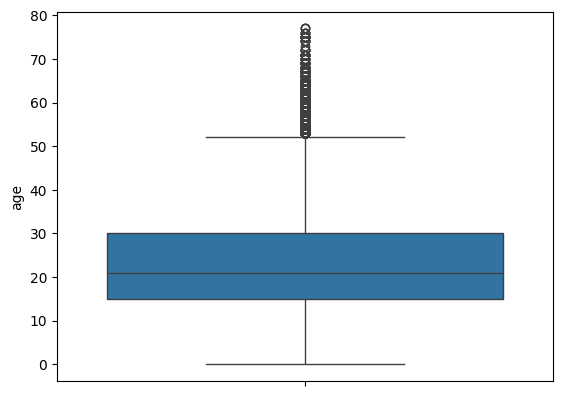

In [99]:
sns.boxplot(df['age'])

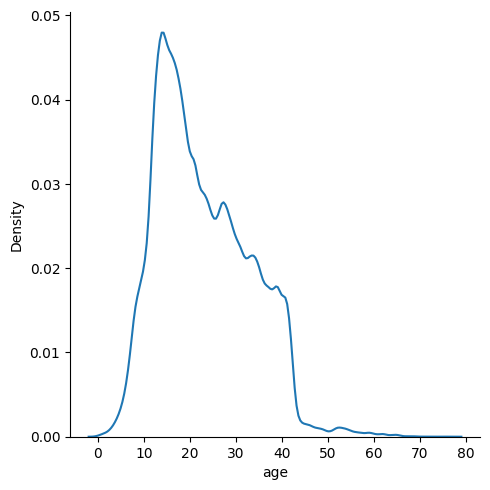

In [100]:
sns.displot(df['age'],kind='kde')

### balance:

In [101]:
df['balance'].describe()

count    750000.000000
mean       2296.327964
std        1381.568588
min           0.000000
25%        1294.000000
50%        1928.000000
75%        2683.000000
max        8216.000000
Name: balance, dtype: float64

<Axes: ylabel='balance'>

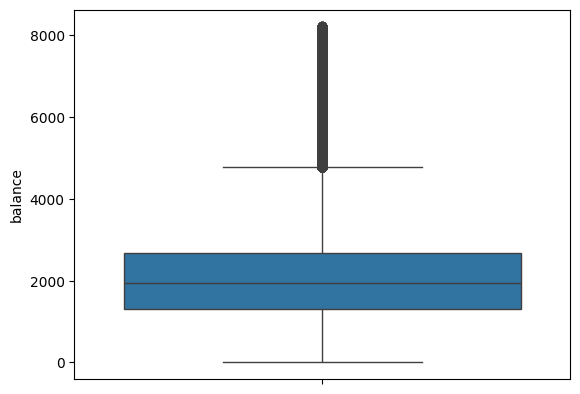

In [102]:
sns.boxplot(df['balance'])

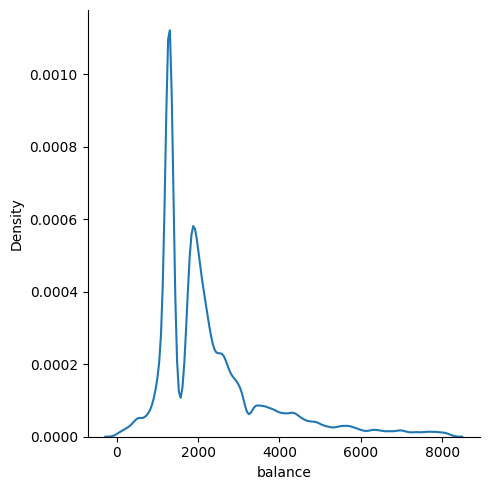

In [103]:
sns.displot(df['balance'],kind='kde')

### duration

In [104]:
df['duration'].describe()

count    750000.000000
mean        253.585712
std         268.748406
min           0.000000
25%          89.000000
50%         131.000000
75%         359.000000
max        1759.000000
Name: duration, dtype: float64

<Axes: ylabel='duration'>

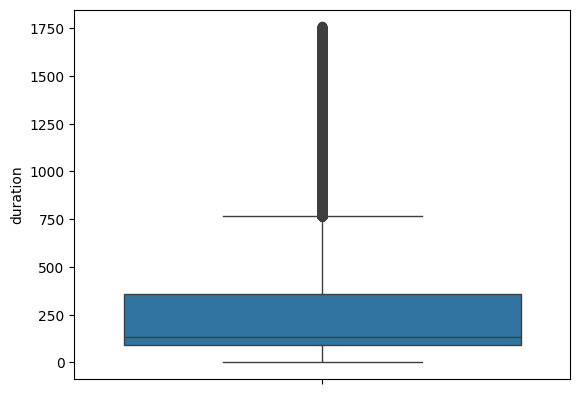

In [105]:
sns.boxplot(df['duration'])

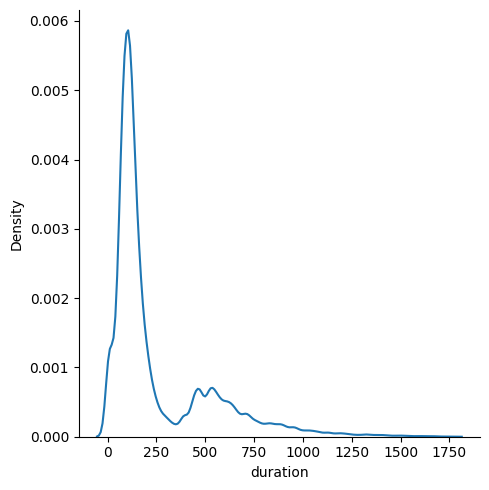

In [106]:
sns.displot(df['duration'],kind='kde')

# finding the coorelation with the target column:

In [107]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.034499,-0.414571,-0.128344,-0.014364,0.082419,-0.180702,-0.016553,0.029775,-0.015179,-0.050985,-0.004612,0.002047,-0.022656,0.004823,0.010894,0.009523
job,-0.034499,1.000000,0.075587,0.164123,-0.003283,0.019028,-0.140415,-0.030985,-0.114954,0.029036,-0.123905,0.015581,0.010930,-0.027335,-0.000928,0.016686,0.054058
marital,-0.414571,0.075587,1.000000,0.120753,-0.005574,0.037611,-0.028866,-0.047562,-0.055025,-0.010713,-0.013180,0.032630,-0.011701,0.018555,0.014938,-0.014731,0.073598
education,-0.128344,0.164123,0.120753,1.000000,-0.012431,0.081614,-0.107864,-0.050254,-0.144797,0.021341,-0.080375,0.013492,0.008461,-0.003099,0.021618,-0.013892,0.080259
default,-0.014364,-0.003283,-0.005574,-0.012431,1.000000,-0.120533,0.010113,0.089927,0.014166,0.013138,0.012956,-0.033112,0.027788,-0.016184,-0.014703,0.018939,-0.030134
balance,0.082419,0.019028,0.037611,0.081614,-0.120533,1.000000,-0.084365,-0.136527,-0.053496,-0.016546,0.027134,0.179825,-0.041894,0.013729,0.052035,-0.039863,0.186594
housing,-0.180702,-0.140415,-0.028866,-0.107864,0.010113,-0.084365,1.000000,0.064034,0.245907,-0.015233,0.356273,-0.008773,-0.034682,0.121290,0.036137,-0.102445,-0.153589
loan,-0.016553,-0.030985,-0.047562,-0.050254,0.089927,-0.136527,0.064034,1.000000,-0.008430,0.020151,0.040982,-0.031555,0.016353,-0.011812,-0.013364,0.008299,-0.081639
contact,0.029775,-0.114954,-0.055025,-0.144797,0.014166,-0.053496,0.245907,-0.008430,1.000000,-0.028574,0.403256,-0.045618,-0.013666,-0.193342,-0.141824,0.205322,-0.158278
day,-0.015179,0.029036,-0.010713,0.021341,0.013138,-0.016546,-0.015233,0.020151,-0.028574,1.000000,-0.001989,-0.057358,0.178900,-0.086607,-0.051931,0.076963,-0.049625


In [108]:
corr_matrix=df.corr()

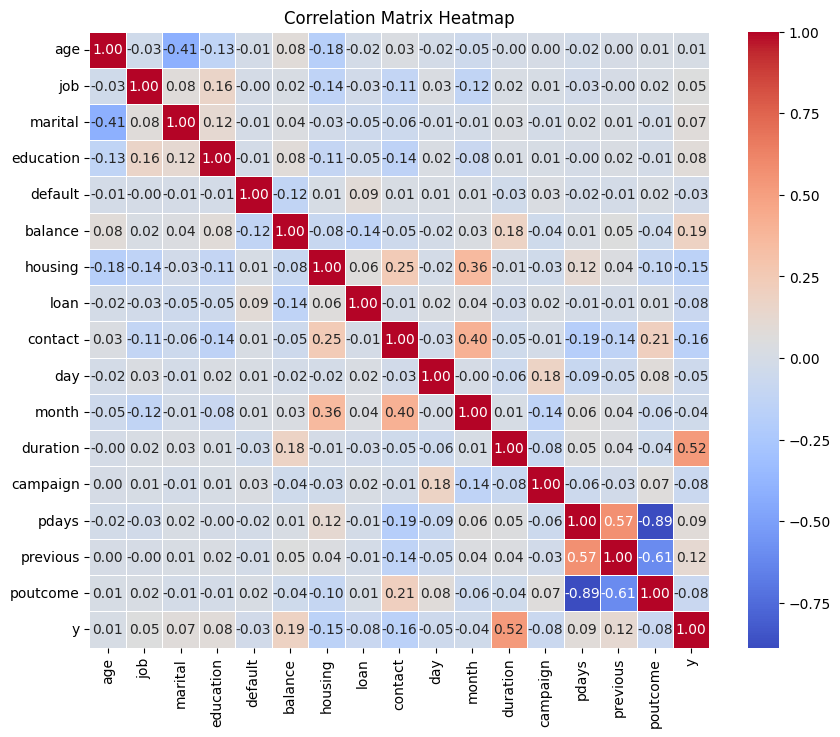

In [109]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Splitting dataset Into training and testing:

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x=df.drop('y',axis=1)
y=df['y']

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [113]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
453635,10.0,1.0,2.0,1.0,0.0,5784.0,1.0,1.0,2.0,11.0,8.0,1282.0,1.0,0.0,0.0,3.0
11651,33.0,9.0,1.0,2.0,0.0,2588.0,0.0,0.0,0.0,26.0,1.0,117.0,8.0,0.0,0.0,3.0
431999,39.0,4.0,0.0,2.0,0.0,1294.0,0.0,0.0,0.0,28.0,4.0,85.0,0.0,0.0,0.0,3.0
529211,30.0,1.0,2.0,0.0,0.0,2616.0,1.0,0.0,2.0,14.0,8.0,81.0,4.0,0.0,0.0,3.0
110925,20.0,0.0,1.0,1.0,0.0,1953.0,1.0,0.0,0.0,27.0,5.0,532.0,3.0,0.0,0.0,3.0


In [114]:
y_train.head()

453635    1.0
11651     0.0
431999    0.0
529211    0.0
110925    0.0
Name: y, dtype: float64

# Scaling the training data:

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
ss=StandardScaler()

In [117]:
x_train_transformed=ss.fit_transform(x_train)
x_test_transformed=ss.transform(x_test)

# training using RandomForest:

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
model_rf=RandomForestClassifier(n_estimators=100,random_state=42)

# Training the model using NN:

In [128]:
print(x_train_transformed.shape)

(600000, 16)


In [136]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [137]:
model=Sequential()

In [138]:
model.add(Dense(32,activation='relu',input_dim=16))
model.add(Dense(16,activation='relu'))

c:\Users\raush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
model.add(Dense(1,activation='sigmoid'))

In [140]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [144]:
history=model.fit(x_train_transformed,y_train,epochs=50,validation_split=0.2,batch_size=64)

Epoch 1/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9199 - loss: 0.1806 - val_accuracy: 0.9215 - val_loss: 0.1771
Epoch 2/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9210 - loss: 0.1780 - val_accuracy: 0.9215 - val_loss: 0.1762
Epoch 3/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9219 - loss: 0.1756 - val_accuracy: 0.9226 - val_loss: 0.1750
Epoch 4/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9234 - loss: 0.1730 - val_accuracy: 0.9236 - val_loss: 0.1733
Epoch 5/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9238 - loss: 0.1731 - val_accuracy: 0.9243 - val_loss: 0.1725
Epoch 6/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9244 - loss: 0.1723 - val_accuracy: 0.9242 - val_loss: 0.1715
Epoch 7/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9246 - loss: 0.1713 - val_accuracy: 0.9242 - val_loss: 0.1711
Epoch 8/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9253 - loss: 0

# importing the testing dataset:

In [151]:
df_test=pd.read_csv('test.csv',index_col=0)

In [152]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [154]:
df_test_encoded=oe.transform(df_test)

In [156]:
df_test_scaled=ss.transform(df_test_encoded)

c:\Users\raush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [157]:
df_test_scaled

array([[-0.88230515, -1.01998048, -0.27939343, ..., -0.30164981,
        -0.22637378,  0.31836041],
       [ 0.30639953, -0.09855468, -0.27939343, ..., -0.30164981,
        -0.22637378,  0.31836041],
       [-0.48607026,  0.51572919, -0.27939343, ..., -0.30164981,
        -0.22637378,  0.31836041],
       ...,
       [ 2.18851528,  0.20858725, -0.27939343, ...,  0.6245396 ,
         5.8516245 , -0.98952213],
       [ 0.90075187, -1.01998048, -0.27939343, ..., -0.30164981,
        -0.22637378,  0.31836041],
       [-1.17948132,  1.13001306,  1.45145421, ..., -0.30164981,
        -0.22637378,  0.31836041]])

In [163]:
# %pip install torch  # Uncomment if you actually need torch for other purposes

# Use Keras model for prediction
y_prob = model.predict(df_test_scaled)  # Already gives probability if final layer is sigmoid

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 5s 684us/step


In [164]:
y_prob

array([[5.9776576e-03],
       [1.4928207e-01],
       [5.7726883e-04],
       ...,
       [8.3974057e-01],
       [6.6703919e-04],
       [3.1115916e-02]], dtype=float32)

In [166]:
# Convert the output array to a DataFrame for clear probability display
import pandas as pd
probabilities = pd.DataFrame(y_prob, columns=['probability'])
probabilities.head()

,probability
0,0.005978
1,0.149282
2,0.000577
3,0.000095
4,0.017583


In [169]:
# Display probabilities rounded to two decimal places
probabilities_rounded = probabilities.round(2)
probabilities_rounded.head()
probabilities_rounded.index=df_test.index


In [170]:
probabilities_rounded.head()

,probability
id,
750000,0.01
750001,0.15
750002,0.00
750003,0.00
750004,0.02


In [172]:
probabilities_rounded.to_csv('submission.csv')